In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast


In [3]:
df = pd.read_csv('pixelHistory.csv')
df

,Unnamed: 0,website,202409,202408,202407,202406,202405,202404,202403,202402,...,202006,202005,202004,202003,202002,202001,201912,201911,201910,201909
0,0,unpkg.com,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1,1,facebook.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,amazonaws.com,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
3,3,google.com.my,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
4,4,nicovideo.jp,['351824429553763'],[],[],['351824429553763'],['351824429553763'],['351824429553763'],['351824429553763'],['351824429553763'],...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1558,daum.net,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1559,1559,spamcop.net,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1560,1560,knowbe4.com,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],NaN
1561,1561,carfax.com,['1797990817173863'],['1797990817173863'],['1797990817173863'],['1797990817173863'],['1797990817173863'],[],[],['1797990817173863'],...,['1797990817173863'],['1797990817173863'],['1797990817173863'],['1797990817173863'],['1797990817173863'],['1797990817173863'],['1797990817173863'],['1797990817173863'],['1797990817173863'],['1797990817173863']


In [6]:
#The dataframe contains lists as values, which are converted to strings once the dataframe is stored as a csv- thus, we need to pre-process the
def readDataframe(csv_file):
    df = pd.read_csv(csv_file)
    try:
        df.drop(columns=['Unnamed: 0'],inplace=True)
    except:
        pass

    for column in df.columns:
        def safe_literal_eval(x):
            if isinstance(x, str) and pd.notna(x):
                try:
                    return ast.literal_eval(x) if pd.notna(x) else x
                except (ValueError, SyntaxError):
                    return x  # Return empty list for problematic entries
            return x  # Return empty list for None or non-string entries
        df[column] = df[column].apply(safe_literal_eval)
    return df

#returns a single merged list of all the pixel IDs of a website
def mergeIDs(row):
    combined_list = []
    for entry in row:
        if isinstance(entry, list):
            combined_list.extend(entry)
    return list(set(combined_list)) if combined_list else None

csv_path = "pixelHistory.csv"
df = readDataframe(csv_path)
df['Combined'] = df.apply(mergeIDs,axis=1)
df

<unknown>:1: SyntaxWarning: invalid decimal literal


,website,202409,202408,202407,202406,202405,202404,202403,202402,202401,...,202005,202004,202003,202002,202001,201912,201911,201910,201909,Combined
0,unpkg.com,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],None
1,facebook.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,amazonaws.com,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],None
3,google.com.my,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],None
4,nicovideo.jp,[351824429553763],[],[],[351824429553763],[351824429553763],[351824429553763],[351824429553763],[351824429553763],[351824429553763],...,[],[],[],[],[],[],[],[],[],[351824429553763]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,daum.net,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],None
1559,spamcop.net,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],None
1560,knowbe4.com,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],NaN,None
1561,carfax.com,[1797990817173863],[1797990817173863],[1797990817173863],[1797990817173863],[1797990817173863],[],[],[1797990817173863],[],...,[1797990817173863],[1797990817173863],[1797990817173863],[1797990817173863],[1797990817173863],[1797990817173863],[1797990817173863],[1797990817173863],[1797990817173863],[1797990817173863]


Text(0.5, 0, 'Time')

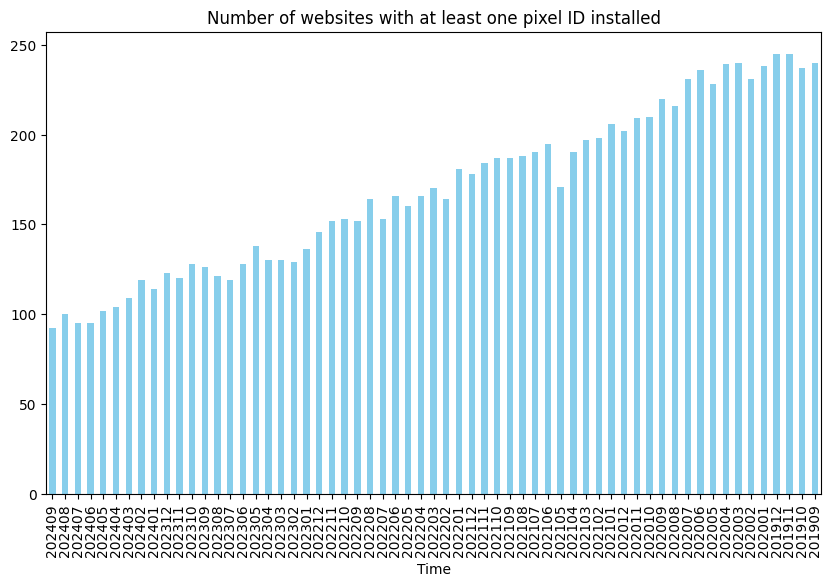

In [24]:
def count_non_empty_lists_and_not_null(series):
    return series.apply(lambda x: isinstance(x, list) and len(x) > 0).sum()

# Apply the function to each column except the 'website' column
non_empty_counts = df.drop(['website',"Combined"], axis=1).apply(count_non_empty_lists_and_not_null)

# Plot the results
plt.figure(figsize=(10, 6))
non_empty_counts.plot(kind='bar', color='skyblue')

plt.title('Number of websites with at least one pixel ID installed')
plt.xlabel('Time')

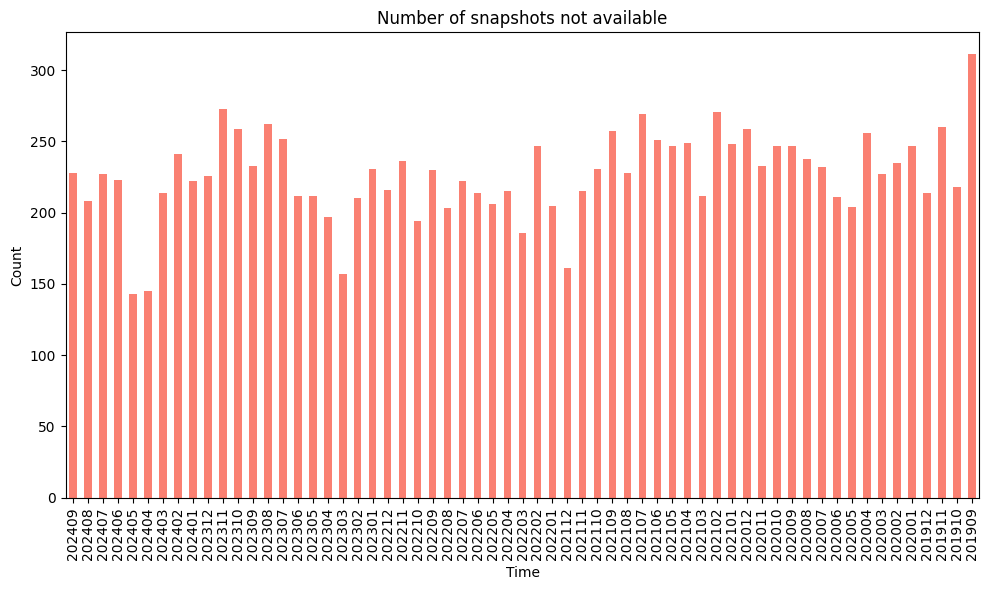

In [25]:
null_counts = df.drop(['website',"Combined"], axis=1).isnull().sum()

# Plot the results
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='salmon')

plt.title('Number of snapshots not available')
plt.xlabel('Time')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

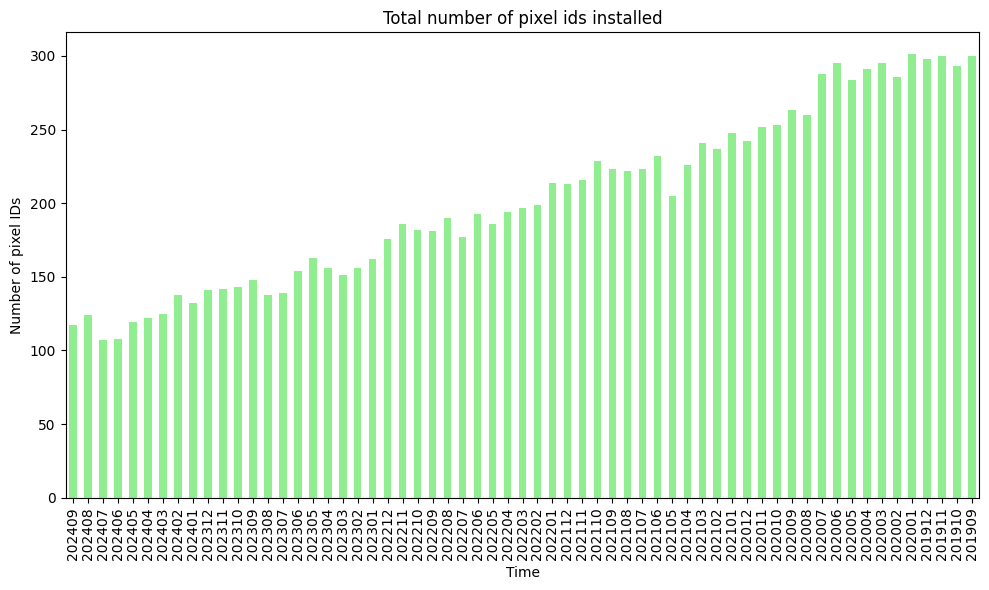

In [33]:
def sum_list_lengths(series):
    return series.apply(lambda x: len(x) if isinstance(x, list) else 0).sum()

list_length_sums = df.drop(['website','Combined'], axis=1).apply(sum_list_lengths)

plt.figure(figsize=(10, 6))
list_length_sums.plot(kind='bar', color='lightgreen')

plt.title('Total number of pixel ids installed')
plt.xlabel('Time')
plt.ylabel('Number of pixel IDs')
plt.tight_layout()
plt.show()

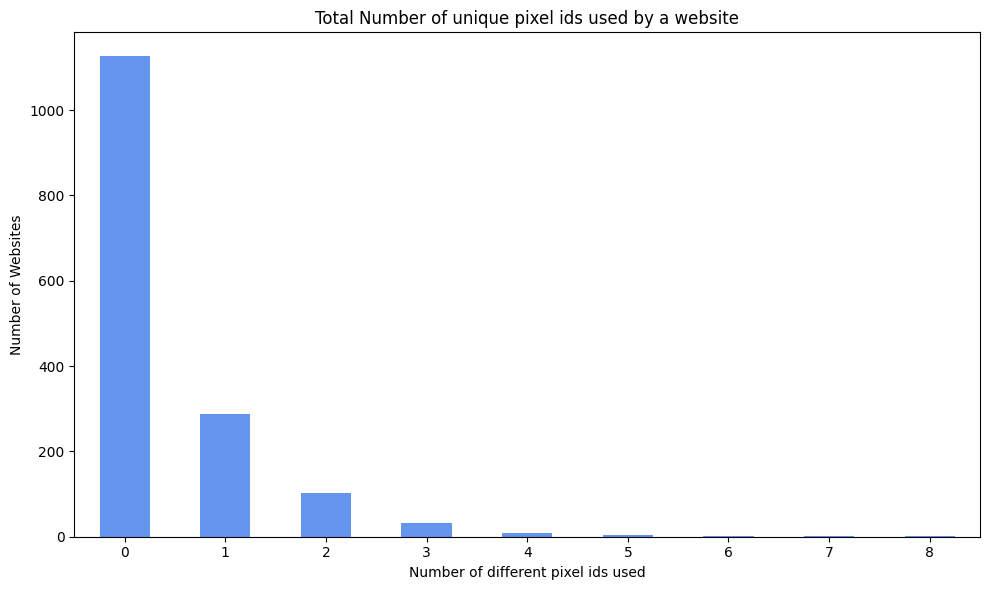

In [56]:
df['list_length'] = df['Combined'].apply(lambda x: len(x) if isinstance(x, list) else 0)

length_counts = df['list_length'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
length_counts.plot(kind='bar', color='cornflowerblue')

plt.title('Total Number of unique pixel ids used by a website')
plt.xlabel('Number of different pixel ids used')
plt.ylabel('Number of Websites')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()